In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

variable1 = 'RM'
variable2 = 'MEDV'

housing_df = pd.read_csv('BostonHousing.csv')

housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


In [5]:
quantitative_columns_1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT', 'MEDV', 'CAT. MEDV']

missing_columns = housing_df[quantitative_columns_1].columns[housing_df[quantitative_columns_1].isnull().any()].tolist()

housing_df[missing_columns] =housing_df[missing_columns].fillna("NAN")

styled_missing_data = housing_df[quantitative_columns_1].style.applymap(lambda x: 'background-color: yellow' if x == "NA" else '', subset=missing_columns)
styled_missing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,LSTAT,MEDV,CAT. MEDV
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1,296,4.980000,24.000000,0
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2,242,9.140000,21.600000,0
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2,242,4.030000,34.700000,1
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3,222,2.940000,33.400000,1
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3,222,5.330000,36.200000,1
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3,222,5.210000,28.700000,0
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5,311,12.430000,22.900000,0
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5,311,19.150000,27.100000,0
8,0.211240,12.500000,7.870000,0,0.524000,5.631000,100.000000,6.082100,5,311,29.930000,16.500000,0
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5,311,17.100000,18.900000,0


In [6]:
quantitative_columns_2 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV']
ptratio_column = housing_df['PTRATIO']

# Calculate the IQR (Interquartile Range)
Q1 = ptratio_column.quantile(0.25)
Q3 = ptratio_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ptratio_column[(ptratio_column < lower_bound) | (ptratio_column > upper_bound)]
# Create a DataFrame to display 'PTRATIO' values with suspected outliers and possible causes
outliers_df = pd.DataFrame({'PTRATIO': ptratio_column, 'Possible Cause': ''})

# Mark outliers with their possible causes
outliers_df = pd.DataFrame({'PTRATIO': ptratio_column, 'Possible Cause': ''})

for idx, value in ptratio_column.items():
    if not isinstance(value, (int, float)):
        outliers_df.loc[idx, 'Possible Cause'] = 'a-Non-numeric value'  # Non-numeric value
    elif value < lower_bound or value > upper_bound:
        outliers_df.loc[idx, 'Possible Cause'] = 'c-Genuine outlier'  # Genuine outlier
    elif abs(value - round(value)) >= 0.5:
        outliers_df.loc[idx, 'Possible Cause'] = 'b-Shift in decimal place'  # Shift in decimal place

# Display the DataFrame with highlighted cells and possible causes
outliers_df.style.applymap(lambda x: 'background-color: yellow', subset=['PTRATIO', 'Possible Cause'])

,PTRATIO,Possible Cause
0,15.300000,
1,17.800000,
2,17.800000,
3,18.700000,
4,18.700000,
5,18.700000,
6,15.200000,
7,15.200000,
8,15.200000,
9,15.200000,


In [7]:
boston_data_omission = housing_df.dropna()

mean_age = housing_df['AGE'].mean()
housing_df['AGE'].fillna(mean_age, inplace=True)

housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


In [116]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [8]:
statistics = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Min': [],
    'Max': [],
    'Standard Deviation': []
}

for column in quantitative_columns:
    statistics['Variable'].append(column)
    statistics['Mean'].append(np.mean(housing_df[column]))
    statistics['Median'].append(np.median(housing_df[column]))
    statistics['Min'].append(np.min(housing_df[column]))
    statistics['Max'].append(np.max(housing_df[column]))
    statistics['Standard Deviation'].append(np.std(housing_df[column]))
    
statistics_df = pd.DataFrame(statistics)

print(statistics_df)

NameError: name 'quantitative_columns' is not defined

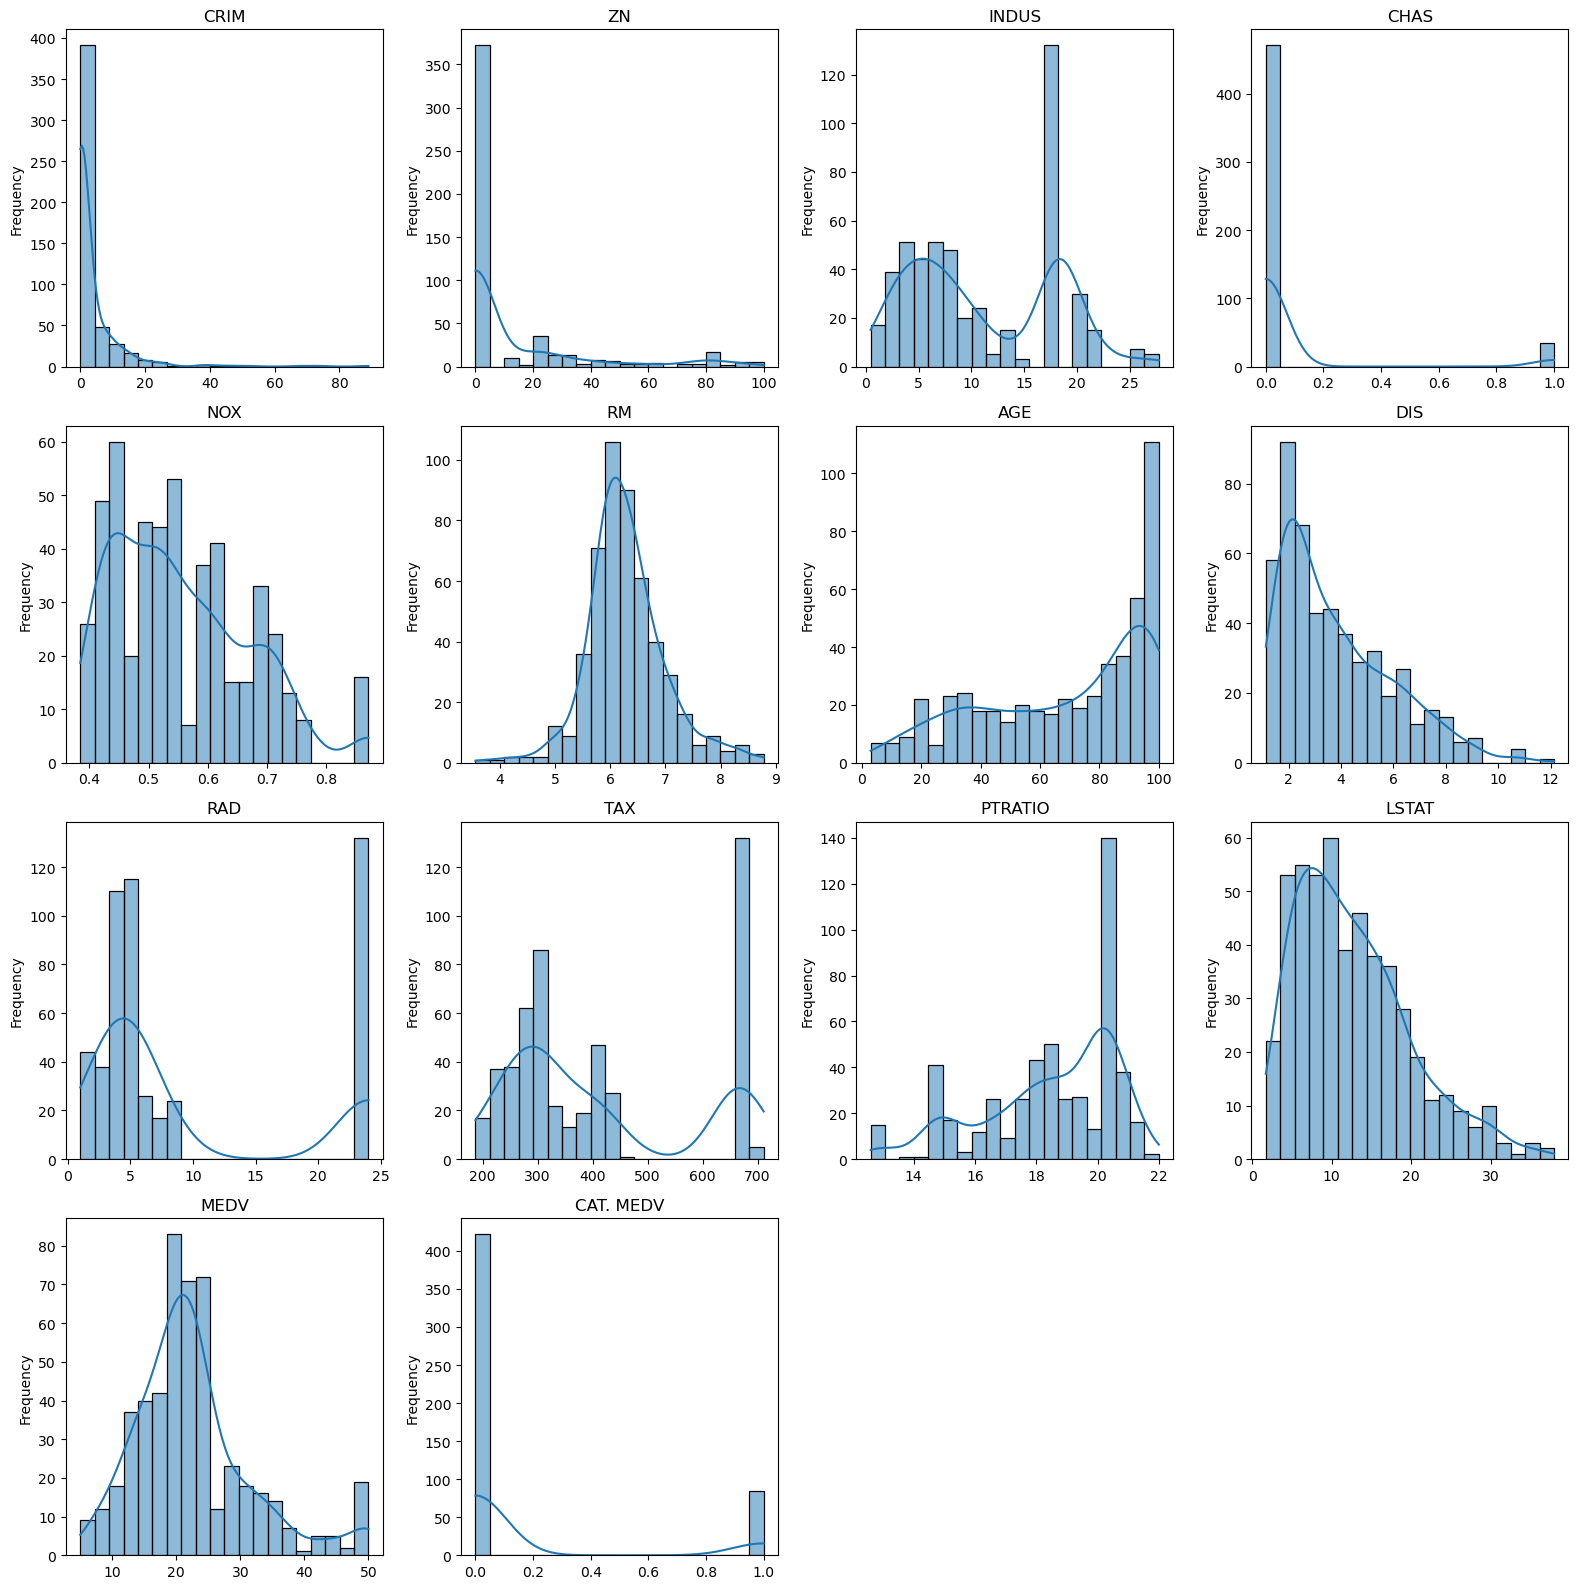

In [42]:
plt.figure(figsize=(16, 16))
for i, column in enumerate(quantitative_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(housing_df[column], bins=20, kde=True)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

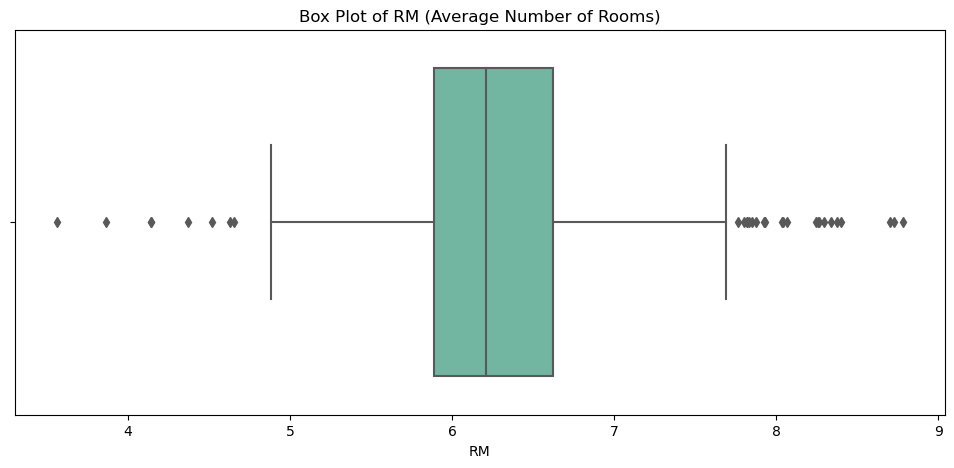

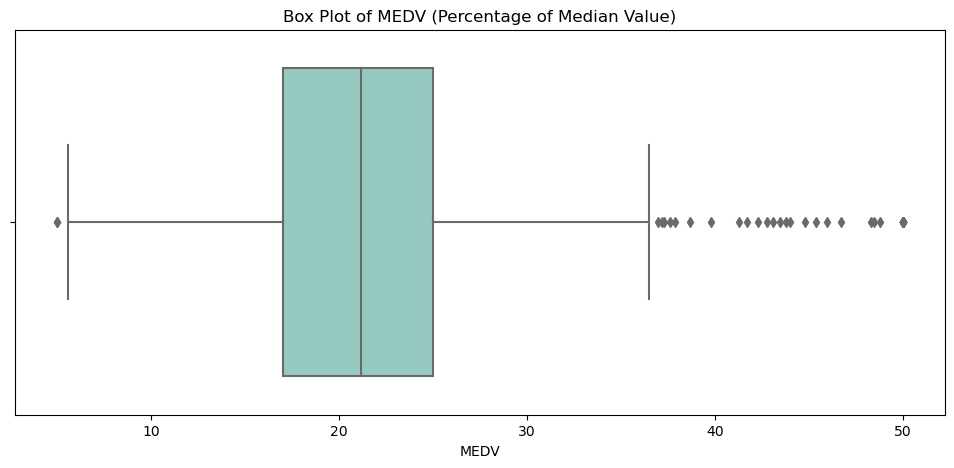

In [9]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='RM', data=housing_df, palette="Set2")
plt.title('Box Plot of RM (Average Number of Rooms)')
plt.xlabel('RM')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='MEDV', data=housing_df, palette="Set3")
plt.title('Box Plot of MEDV (Percentage of Median Value)')
plt.xlabel('MEDV')
plt.show()

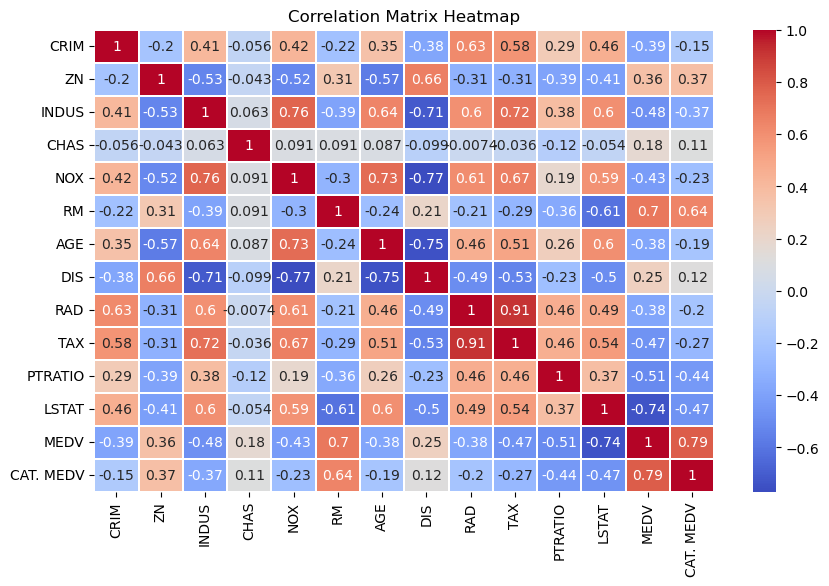

In [11]:
correlation_matrix = housing_df[quantitative_columns_2].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.1)
plt.title("Correlation Matrix Heatmap")
plt.show()